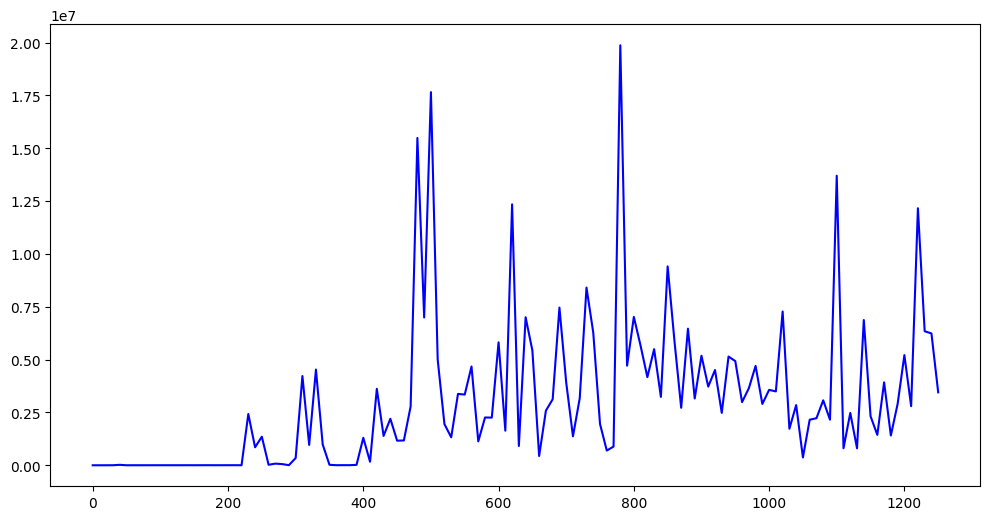

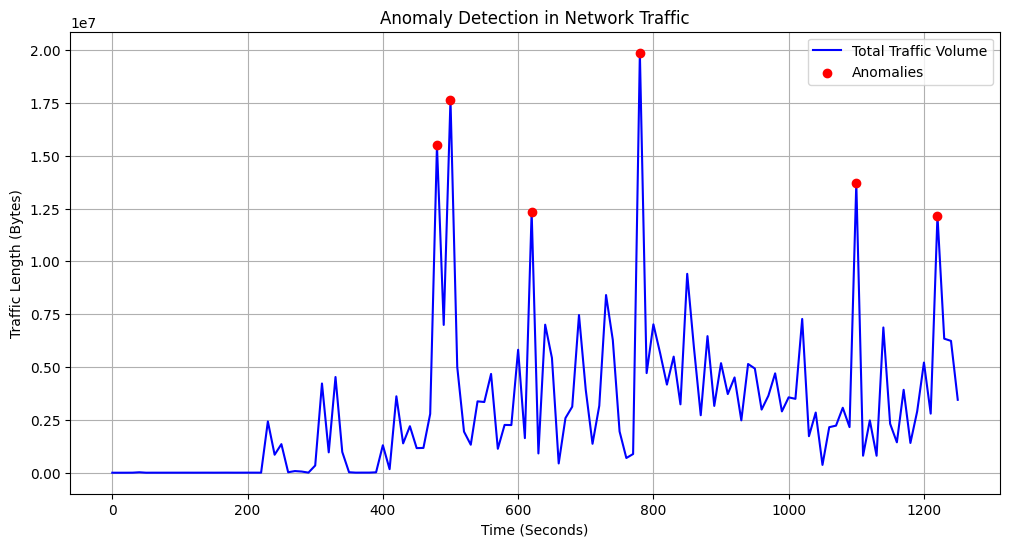

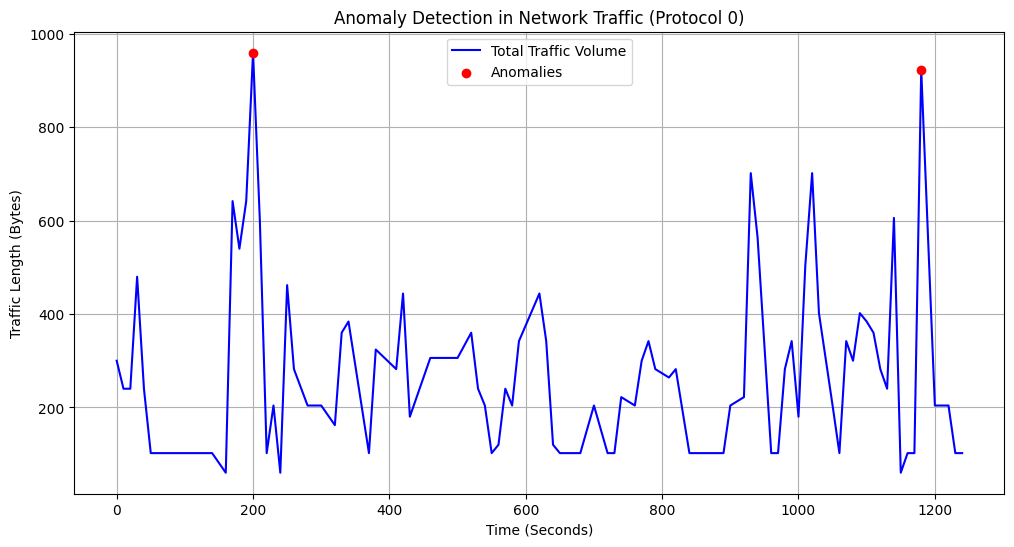

Anomalies for Protocol 0:
     TimeGroup  Protocol  TotalLength  Anomaly
61       200.0         0          960     True
673     1180.0         0          924     True


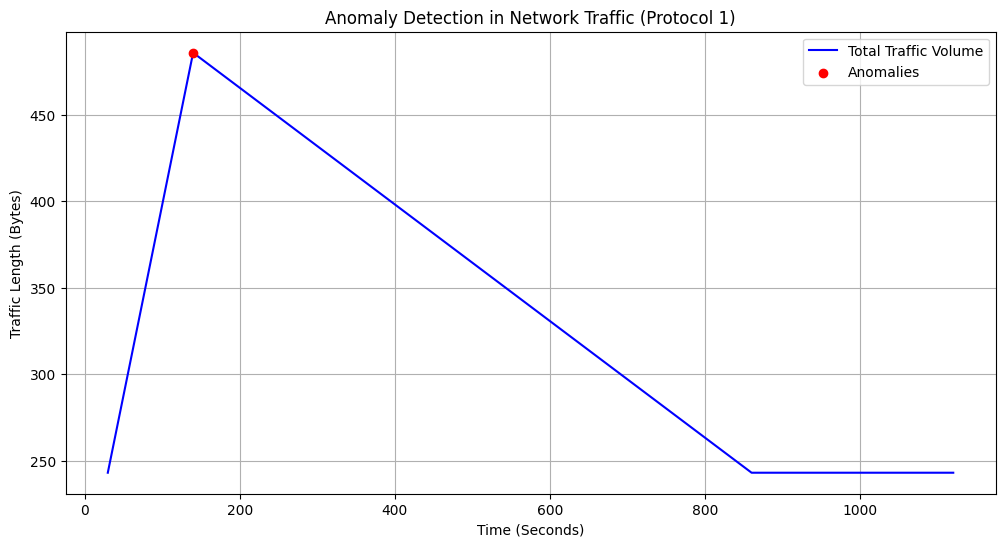

Anomalies for Protocol 1:
    TimeGroup  Protocol  TotalLength  Anomaly
38      140.0         1          486     True


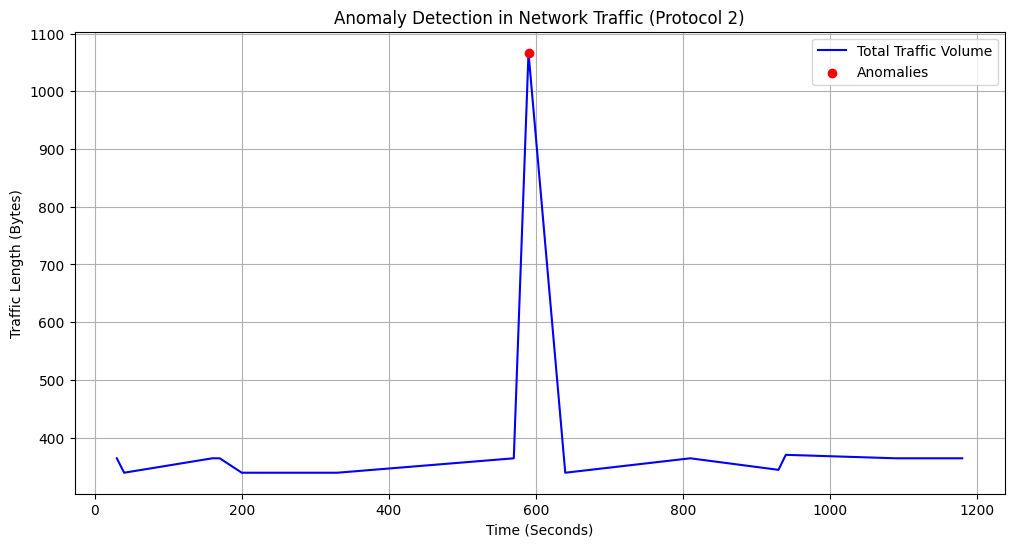

Anomalies for Protocol 2:
     TimeGroup  Protocol  TotalLength  Anomaly
285      590.0         2         1067     True


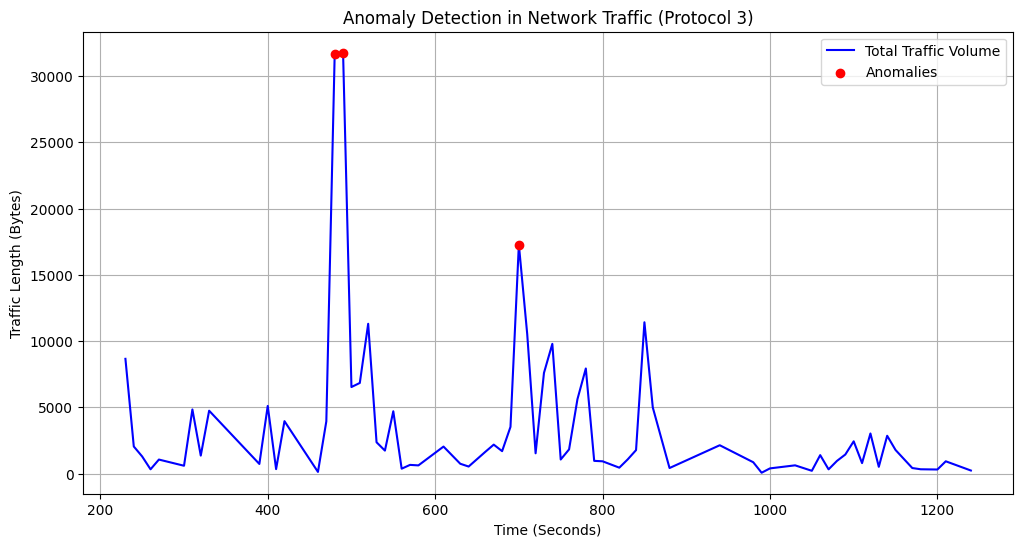

Anomalies for Protocol 3:
     TimeGroup  Protocol  TotalLength  Anomaly
205      480.0         3        31684     True
212      490.0         3        31750     True
363      700.0         3        17282     True


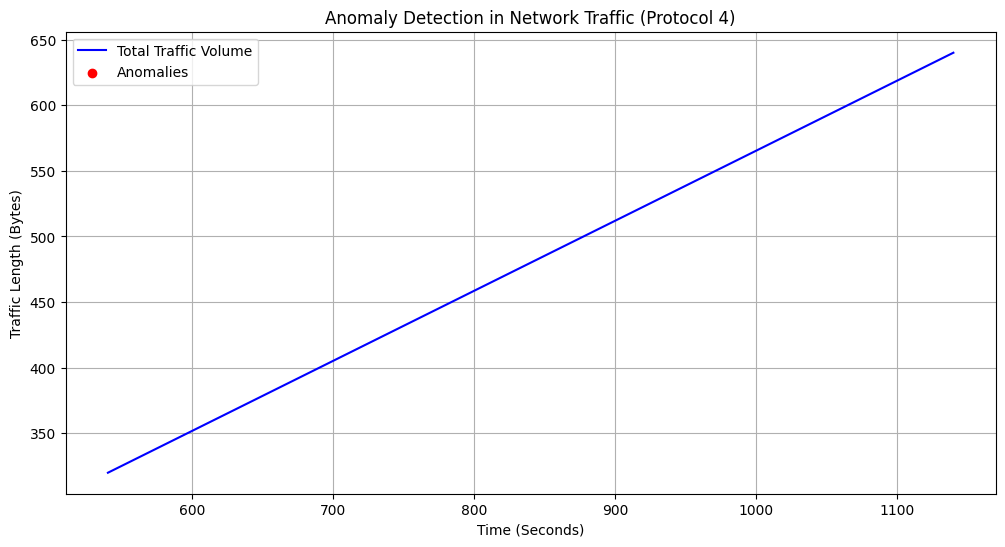

Anomalies for Protocol 4:
Empty DataFrame
Columns: [TimeGroup, Protocol, TotalLength, Anomaly]
Index: []


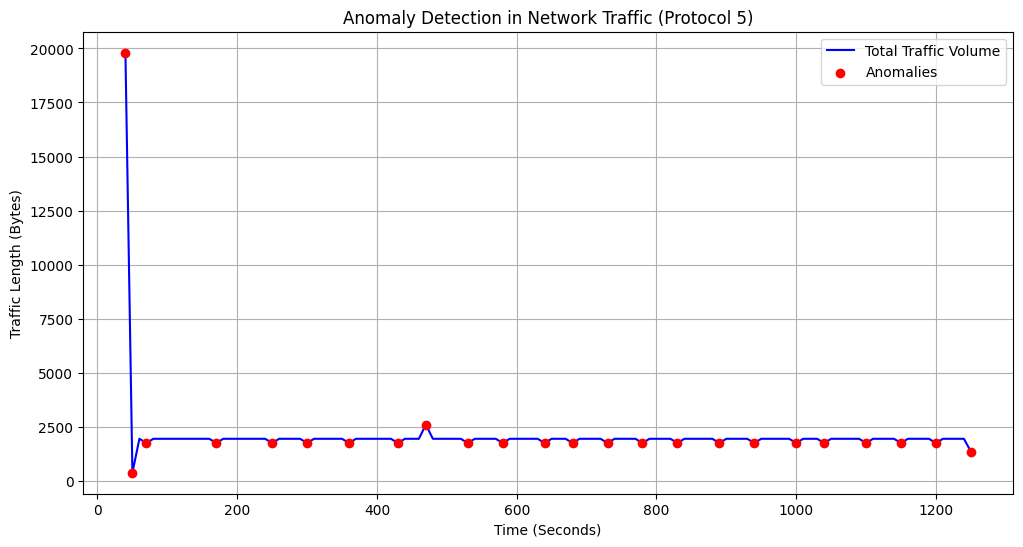

Anomalies for Protocol 5:
     TimeGroup  Protocol  TotalLength  Anomaly
13        40.0         5        19800     True
17        50.0         5          392     True
21        70.0         5         1764     True
50       170.0         5         1764     True
89       250.0         5         1764     True
116      300.0         5         1764     True
148      360.0         5         1764     True
184      430.0         5         1764     True
201      470.0         5         2616     True
241      530.0         5         1764     True
278      580.0         5         1764     True
320      640.0         5         1764     True
351      680.0         5         1764     True
387      730.0         5         1764     True
420      780.0         5         1764     True
453      830.0         5         1764     True
495      890.0         5         1764     True
527      940.0         5         1764     True
565     1000.0         5         1764     True
585     1040.0         5         1

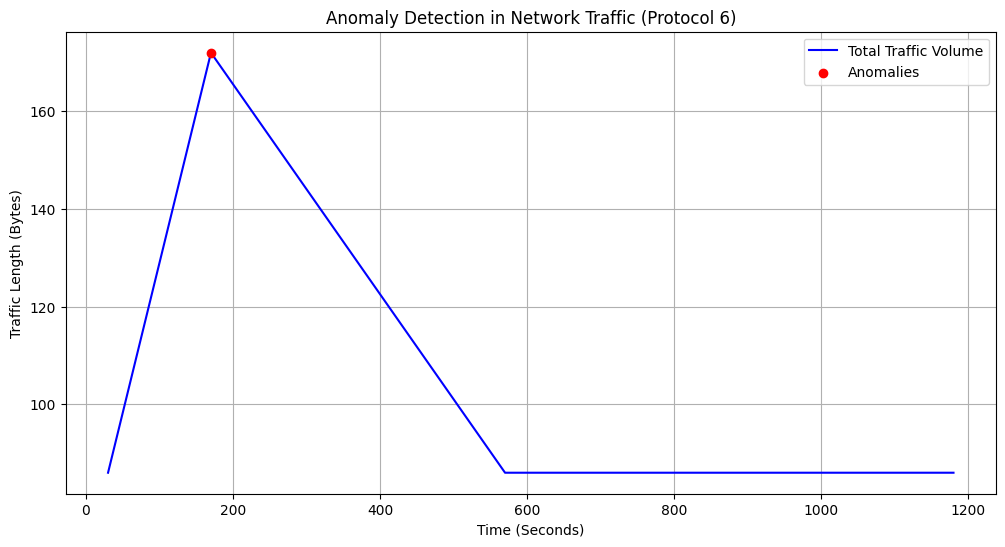

Anomalies for Protocol 6:
    TimeGroup  Protocol  TotalLength  Anomaly
51      170.0         6          172     True


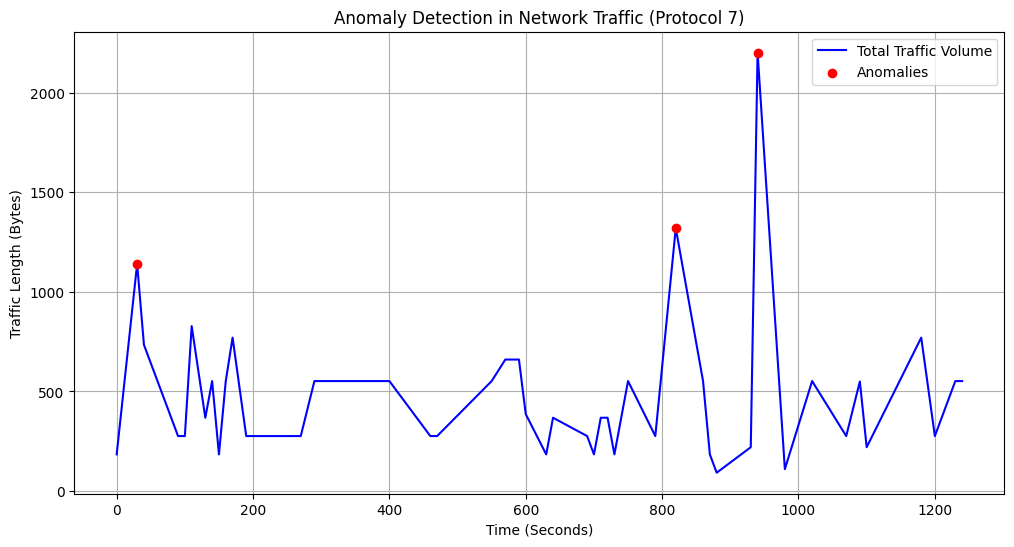

Anomalies for Protocol 7:
     TimeGroup  Protocol  TotalLength  Anomaly
9         30.0         7         1140     True
447      820.0         7         1320     True
528      940.0         7         2200     True


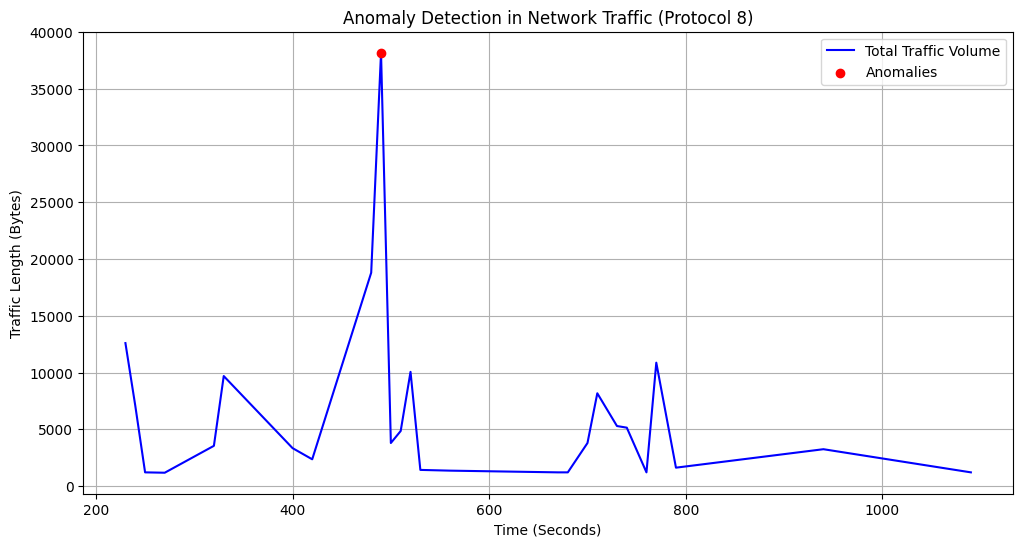

Anomalies for Protocol 8:
     TimeGroup  Protocol  TotalLength  Anomaly
214      490.0         8        38161     True


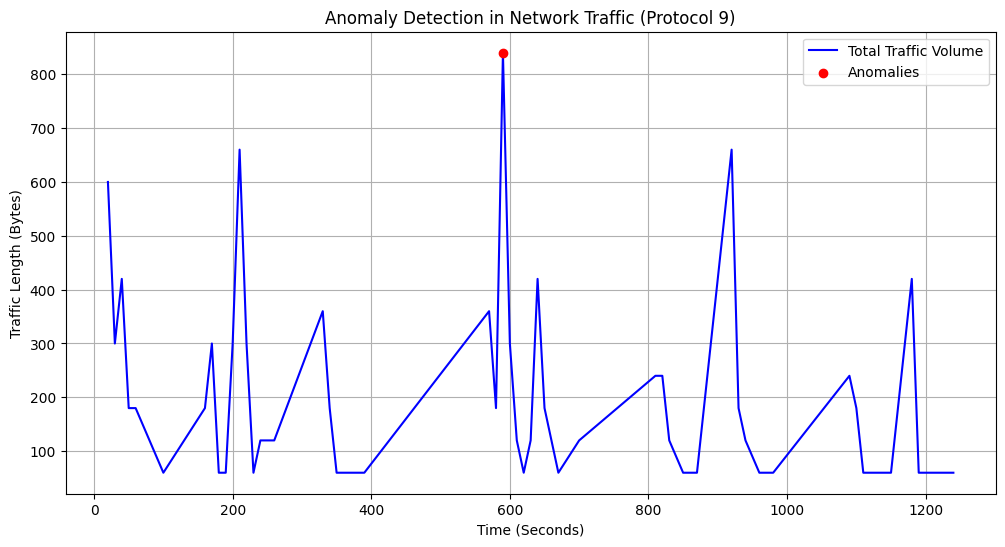

Anomalies for Protocol 9:
     TimeGroup  Protocol  TotalLength  Anomaly
289      590.0         9          840     True


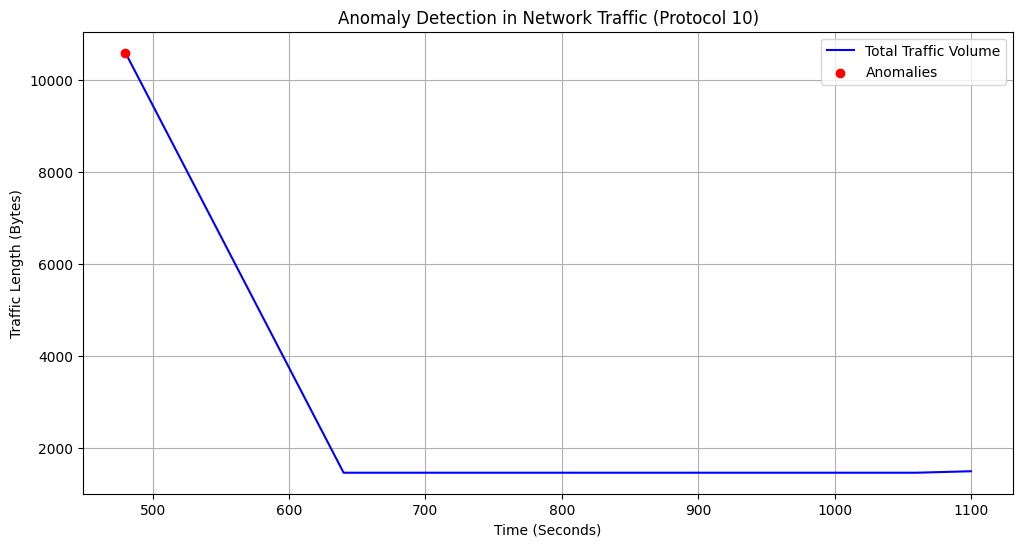

Anomalies for Protocol 10:
     TimeGroup  Protocol  TotalLength  Anomaly
208      480.0        10        10598     True


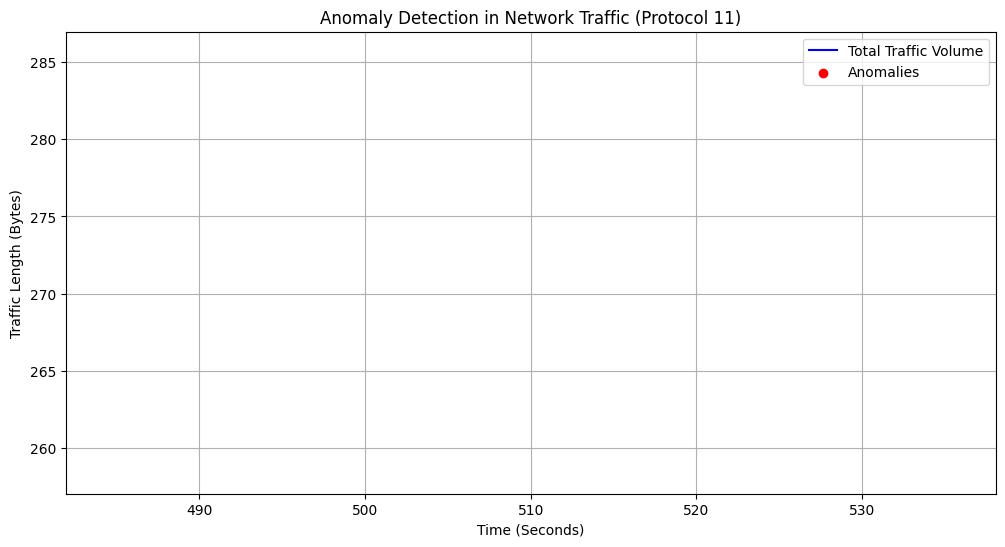

Anomalies for Protocol 11:
Empty DataFrame
Columns: [TimeGroup, Protocol, TotalLength, Anomaly]
Index: []


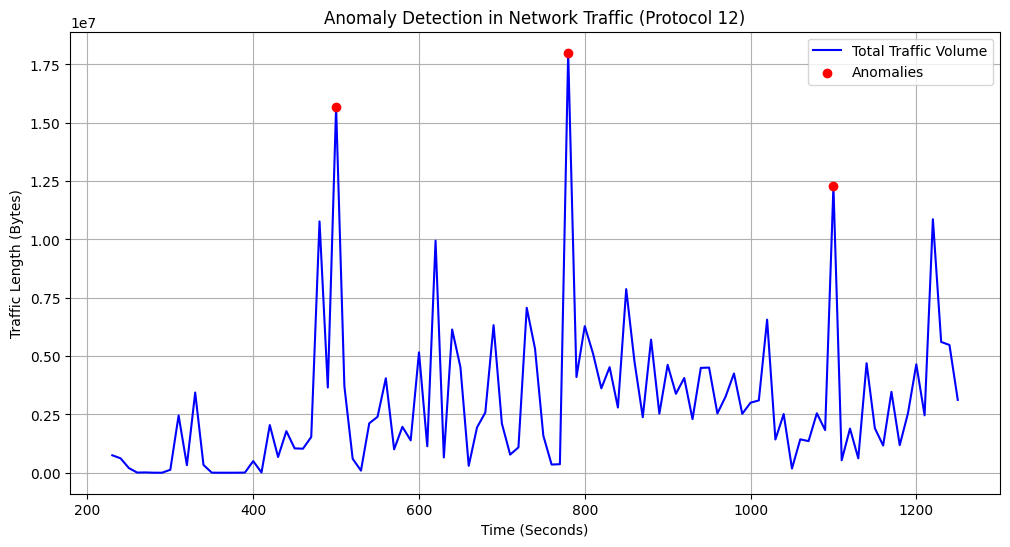

Anomalies for Protocol 12:
     TimeGroup  Protocol  TotalLength  Anomaly
222      500.0        12     15679574     True
421      780.0        12     18003939     True
628     1100.0        12     12272151     True


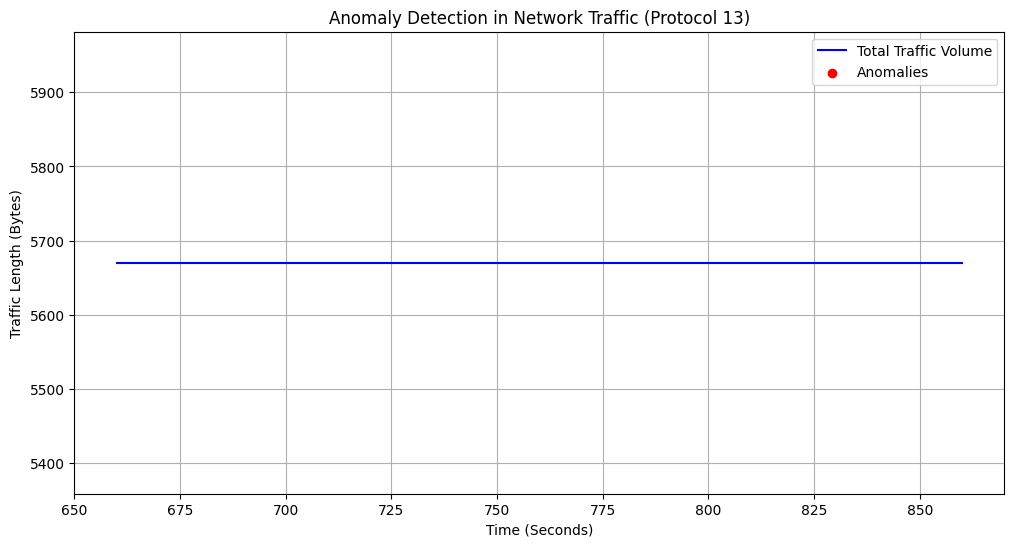

Anomalies for Protocol 13:
Empty DataFrame
Columns: [TimeGroup, Protocol, TotalLength, Anomaly]
Index: []


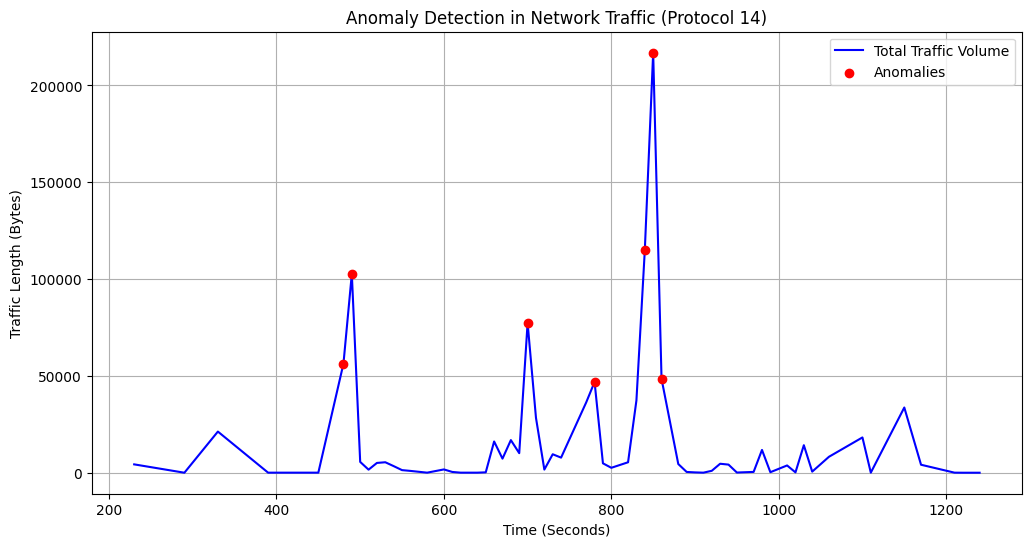

Anomalies for Protocol 14:
     TimeGroup  Protocol  TotalLength  Anomaly
210      480.0        14        56406     True
216      490.0        14       102764     True
369      700.0        14        77478     True
422      780.0        14        46987     True
463      840.0        14       114833     True
470      850.0        14       216877     True
479      860.0        14        48599     True


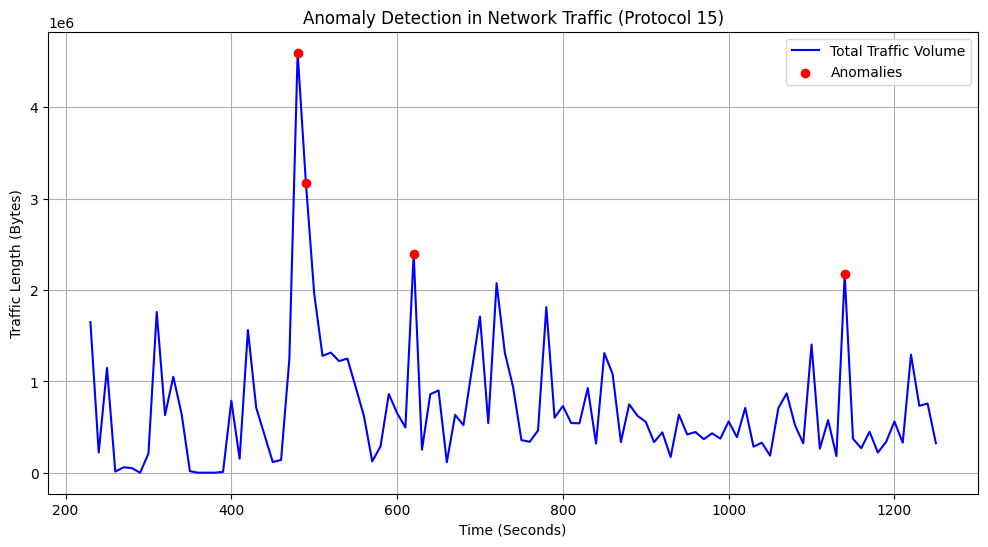

Anomalies for Protocol 15:
     TimeGroup  Protocol  TotalLength  Anomaly
211      480.0        15      4597622     True
217      490.0        15      3166499     True
309      620.0        15      2397351     True
655     1140.0        15      2171853     True


In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('Midterm_53_group.csv')

data = data.drop(['No.','Info'],axis = 1)

data.Time = pd.to_numeric(data.Time)

data['TimeGroup'] = (data['Time'] // 10) * 10

data1 = data.groupby(['TimeGroup']).agg(TotalLength = ('Length','sum')).reset_index()

data1

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data1['TimeGroup'], data1['TotalLength'], label='Total Traffic Volume', color='blue')

Q1 = data1.TotalLength.quantile(0.25)
Q3 = data1.TotalLength.quantile(0.75)
IQR = Q3-Q1
data1['Anomaly'] = (
    (data1.TotalLength < Q1 - 1.5 * IQR) | 
    (data1.TotalLength > Q3 + 1.5 * IQR)
)

traffic_agg = data1
data1[data1['Anomaly']==True]



import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data1['TimeGroup'], data1['TotalLength'], label='Total Traffic Volume', color='blue')
plt.scatter(
    traffic_agg['TimeGroup'][traffic_agg['Anomaly']],
    traffic_agg['TotalLength'][traffic_agg['Anomaly']],
    color='red',
    label='Anomalies',
    zorder=5
)
plt.xlabel("Time (Seconds)")
plt.ylabel("Traffic Length (Bytes)")
plt.title("Anomaly Detection in Network Traffic")
plt.legend()
plt.grid()
plt.show()


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Protocol = le.fit_transform(data.Protocol)
data.Source = le.fit_transform(data.Source)
data.Destination = le.fit_transform(data.Destination)

data2 = data.groupby(['TimeGroup','Protocol']).agg(TotalLength = ('Length','sum')).reset_index()

data2

import matplotlib.pyplot as plt

unique_protocols = data2['Protocol'].unique()
unique_protocols = np.sort(unique_protocols)
for protocol in unique_protocols:
    data_protocol = data2[data2['Protocol'] == protocol].copy()

    Q1 = data_protocol['TotalLength'].quantile(0.25)
    Q3 = data_protocol['TotalLength'].quantile(0.75)
    IQR = Q3 - Q1

    data_protocol['Anomaly'] = (
        (data_protocol['TotalLength'] < Q1 - 2 * IQR) | 
        (data_protocol['TotalLength'] > Q3 + 2 * IQR)
    )

    plt.figure(figsize=(12, 6))
    plt.plot(data_protocol['TimeGroup'], data_protocol['TotalLength'], label='Total Traffic Volume', color='blue')
    plt.scatter(
        data_protocol['TimeGroup'][data_protocol['Anomaly']],
        data_protocol['TotalLength'][data_protocol['Anomaly']],
        color='red',
        label='Anomalies',
        zorder=5
    )
    plt.xlabel("Time (Seconds)")
    plt.ylabel("Traffic Length (Bytes)")
    plt.title(f"Anomaly Detection in Network Traffic (Protocol {protocol})")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Anomalies for Protocol {protocol}:")
    print(data_protocol[data_protocol['Anomaly'] == True])
